In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [13]:
N_STOCKS: int = 10

# Observable / Measurable / Instantaneous
K_FEATURES: int = 3

In [14]:
X: np.ndarray = np.random.randn(N_STOCKS, K_FEATURES)
X

array([[-0.51356763, -1.25597819, -0.06272152],
       [ 1.70469861,  1.02267022,  0.05895869],
       [-0.26292145,  0.65683725, -0.91079751],
       [-0.26243586, -1.99880363,  1.05836433],
       [ 2.39470309,  0.69712501,  0.7562924 ],
       [ 0.67240075,  0.65559154, -0.01007304],
       [ 0.13420024,  1.45057833, -0.57606377],
       [-0.90647841,  0.65462171,  0.18478769],
       [-0.18894148, -0.05913413, -0.77226753],
       [-1.04362097,  1.05393185, -0.64912303]])

In [29]:
weights: np.ndarray = np.vstack([np.array([[1 / 10]] * 5), np.array([[-1 / 10]] * 5)])
weights

array([[ 0.1],
       [ 0.1],
       [ 0.1],
       [ 0.1],
       [ 0.1],
       [-0.1],
       [-0.1],
       [-0.1],
       [-0.1],
       [-0.1]])

In [30]:
np.sum(np.abs(weights))

1.0

<Axes: >

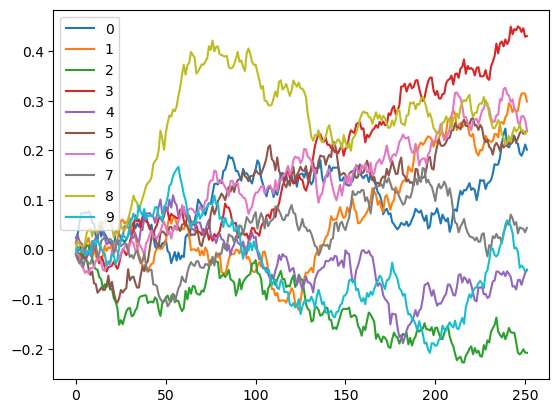

In [24]:
stock_returns: np.ndarray = np.random.normal(loc=0.10 / 252, scale=0.20 / np.sqrt(252), size=(252, 10))
pd.DataFrame(stock_returns).cumsum().plot()

In [49]:
def get_sorted_stock_returns(stock_returns: np.ndarray) -> pd.DataFrame:
    return pd.DataFrame(stock_returns)[np.random.choice(pd.DataFrame(stock_returns).columns, replace=False, size=N_STOCKS)]


factor_0_stock_returns = get_sorted_stock_returns(stock_returns=stock_returns)
factor_1_stock_returns = get_sorted_stock_returns(stock_returns=stock_returns)
factor_2_stock_returns = get_sorted_stock_returns(stock_returns=stock_returns)

In [47]:
factor_0_returns = factor_0_stock_returns.dot(weights)
factor_1_returns = factor_1_stock_returns.dot(weights)
factor_2_returns = factor_2_stock_returns.dot(weights)

,factor_0,factor_1,factor_2
0,-0.001229,0.005575,0.001790
1,-0.000676,0.002896,-0.006433
2,0.005401,0.005004,0.007041
3,0.004373,-0.002977,-0.004336
4,-0.001180,0.002695,-0.000651
...,...,...,...
247,-0.002988,-0.003058,0.004681
248,-0.002305,0.001125,0.005193
249,-0.003172,-0.000264,-0.002248
250,0.001685,0.006375,0.002838


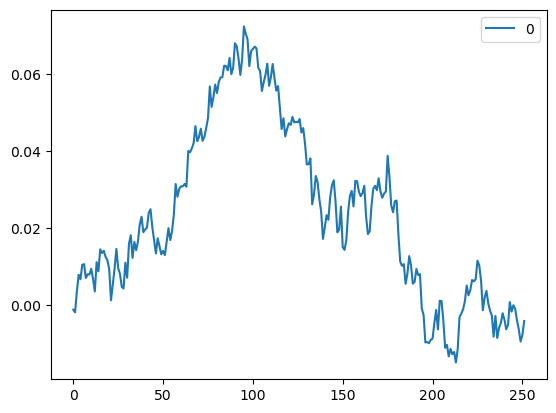

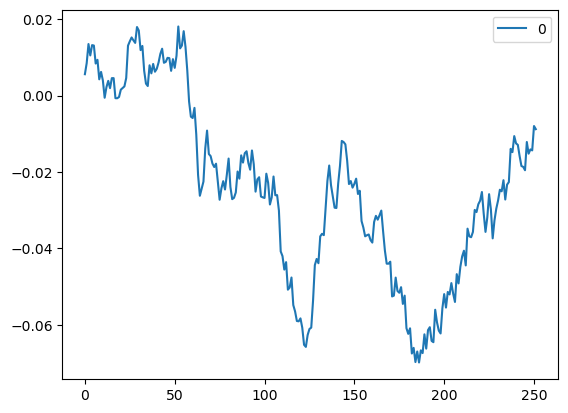

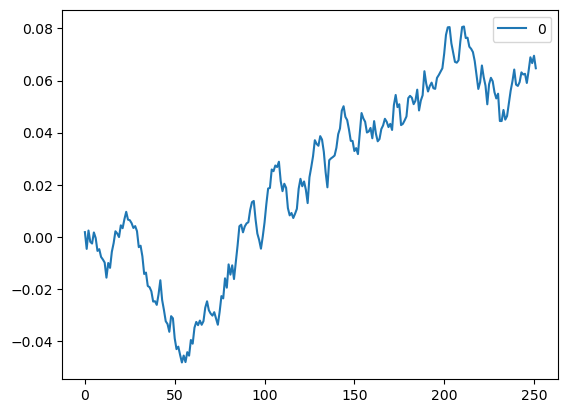

In [96]:
factor_0_returns.cumsum().plot()
factor_1_returns.cumsum().plot()
factor_2_returns.cumsum().plot()

factor_returns = pd.DataFrame({"factor_0": factor_0_returns.values.reshape(-1), "factor_1": factor_1_returns.values.reshape(-1), "factor_2": factor_2_returns.values.reshape(-1)})
factor_returns

In [51]:
returns = factor_return * b

,0,1,2,3,4,5,6,7,8,9
0,0.023562,0.010599,-0.006398,-0.009492,0.015578,-0.010284,-0.000348,-0.010784,0.002941,-0.007782
1,0.008934,0.009339,0.001817,0.009811,0.013197,-0.009486,-0.009603,-0.010169,0.014844,0.013675
2,0.024500,-0.002077,-0.017372,-0.001487,-0.014189,0.012051,-0.002568,-0.007388,-0.006894,-0.005953
3,0.017027,-0.028066,0.014102,0.010497,-0.001538,-0.004154,-0.020528,0.010372,-0.003225,-0.001823
4,-0.001417,0.008285,-0.006145,-0.002687,-0.007091,-0.006466,-0.004228,-0.017199,-0.000982,0.002394
...,...,...,...,...,...,...,...,...,...,...
247,-0.018971,0.021311,-0.003358,-0.002618,0.000535,0.009774,-0.004745,0.012219,0.009979,-0.031759
248,-0.004778,0.012609,0.003763,-0.008466,-0.010272,0.006181,0.016864,-0.001940,-0.012877,0.004857
249,0.008554,0.001158,0.006564,0.007436,0.012831,-0.007392,0.000278,-0.001429,0.000881,-0.004063
250,0.013995,-0.001474,-0.006578,-0.017149,0.010977,0.002496,-0.007630,-0.006628,-0.007322,-0.007550


In [74]:
cov = pd.DataFrame(np.hstack([factor_0_returns, stock_returns[: , 0].reshape(-1, 1)])).cov().iloc[0, 1]
beta = (cov / np.var(factor_0_returns)).iloc[0]
alpha = 0.0001

c:\Users\marcu\miniconda3\envs\quant_research\Lib\site-packages\numpy\core\fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [76]:
beta

1.023248710832595

<Axes: >

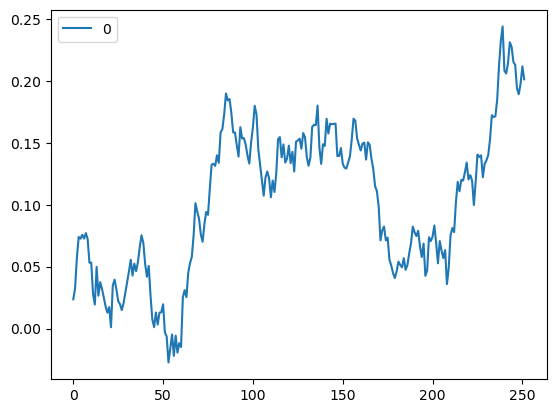

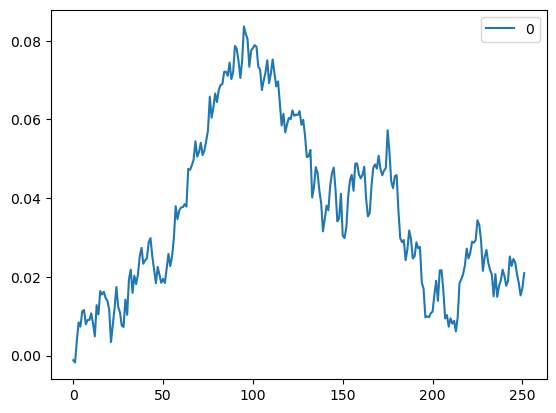

In [75]:
pd.DataFrame(stock_returns[:, 0]).cumsum().plot()
(alpha + factor_0_returns * beta).cumsum().plot()

In [102]:
factor_cov: pd.DataFrame = factor_returns.cov(ddof=1) * 252
factor_cov

,factor_0,factor_1,factor_2
factor_0,0.003811,0.000322,0.000732
factor_1,0.000322,0.003953,0.000819
factor_2,0.000732,0.000819,0.004307


In [101]:
beta: np.ndarray = np.random.standard_normal(size=(N_STOCKS, K_FEATURES))
beta

array([[-1.59634418, -1.13909722,  0.32031749],
       [-0.01770801, -1.06542024,  0.359954  ],
       [-0.63321248,  1.25430133, -1.11604859],
       [-0.28953073, -0.57883289, -0.08279741],
       [-1.30355998, -0.65843218, -0.51797962],
       [-0.47042115, -0.93924235,  1.73035009],
       [-0.75339184, -0.29641383, -0.20240881],
       [ 0.45118957,  0.82006744,  0.59485051],
       [ 0.24055342,  0.47389535,  0.7242709 ],
       [ 1.30279718,  0.24135082, -0.17355448]])

In [114]:
sys_cov = pd.DataFrame(beta.dot(factor_cov).dot(beta.T))
sys_cov

,0,1,2,3,4,5,6,7,8,9
0,0.015107,0.004916,-0.001223,0.004611,0.011607,0.006142,0.006238,-0.007132,-0.004271,-0.009120
1,0.004916,0.004421,-0.005570,0.002258,0.002430,0.004904,0.001139,-0.002888,-0.001413,-0.001254
2,-0.001223,-0.005570,0.011343,-0.001054,0.003353,-0.009620,0.001850,-0.000649,-0.001933,-0.002019
3,0.004611,0.002258,-0.001054,0.001895,0.003913,0.001132,0.001954,-0.003238,-0.002240,-0.002169
4,0.011607,0.002430,0.003353,0.003913,0.011444,-0.000592,0.005963,-0.007549,-0.005667,-0.007428
5,0.006142,0.004904,-0.009620,0.001132,-0.000592,0.013658,0.000067,0.001390,0.003232,-0.002771
6,0.006238,0.001139,0.001850,0.001954,0.005963,0.000067,0.003152,-0.003692,-0.002704,-0.004150
7,-0.007132,-0.002888,-0.000649,-0.003238,-0.007549,0.001390,-0.003692,0.006388,0.004999,0.003467
8,-0.004271,-0.001413,-0.001933,-0.002240,-0.005667,0.003232,-0.002704,0.004999,0.004258,0.002058
9,-0.009120,-0.001254,-0.002019,-0.002169,-0.007428,-0.002771,-0.004150,0.003467,0.002058,0.006631


In [123]:
def garch():
    return np.random.normal(loc=0.10, scale=0.20, size=N_STOCKS) ** 2

ex_ante_total_var = garch()
ex_ante_total_var

array([0.01344763, 0.0197889 , 0.0002153 , 0.00687064, 0.01063235,
       0.0725636 , 0.06330574, 0.00199839, 0.00101849, 0.02622297])

In [119]:
ex_ante_sys_var = np.diag(sys_cov)
ex_ante_sys_var

array([0.01510748, 0.00442139, 0.01134316, 0.00189488, 0.01144435,
       0.01365833, 0.00315207, 0.00638798, 0.00425796, 0.00663142])

In [124]:
ex_ante_idio_var = np.abs(ex_ante_total_var - ex_ante_sys_var)
ex_ante_idio_var

array([0.00165985, 0.01536751, 0.01112785, 0.00497576, 0.00081201,
       0.05890526, 0.06015367, 0.00438959, 0.00323947, 0.01959155])

In [126]:
idio_cov = ex_ante_idio_var * np.identity(n=N_STOCKS)
idio_cov

array([[0.00165985, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.01536751, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.01112785, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00497576, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.00081201,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.05890526, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.06015367, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.       

In [129]:
total_cov = sys_cov + idio_cov
total_cov

,0,1,2,3,4,5,6,7,8,9
0,0.016767,0.004916,-0.001223,0.004611,0.011607,0.006142,0.006238,-0.007132,-0.004271,-0.009120
1,0.004916,0.019789,-0.005570,0.002258,0.002430,0.004904,0.001139,-0.002888,-0.001413,-0.001254
2,-0.001223,-0.005570,0.022471,-0.001054,0.003353,-0.009620,0.001850,-0.000649,-0.001933,-0.002019
3,0.004611,0.002258,-0.001054,0.006871,0.003913,0.001132,0.001954,-0.003238,-0.002240,-0.002169
4,0.011607,0.002430,0.003353,0.003913,0.012256,-0.000592,0.005963,-0.007549,-0.005667,-0.007428
5,0.006142,0.004904,-0.009620,0.001132,-0.000592,0.072564,0.000067,0.001390,0.003232,-0.002771
6,0.006238,0.001139,0.001850,0.001954,0.005963,0.000067,0.063306,-0.003692,-0.002704,-0.004150
7,-0.007132,-0.002888,-0.000649,-0.003238,-0.007549,0.001390,-0.003692,0.010778,0.004999,0.003467
8,-0.004271,-0.001413,-0.001933,-0.002240,-0.005667,0.003232,-0.002704,0.004999,0.007497,0.002058
9,-0.009120,-0.001254,-0.002019,-0.002169,-0.007428,-0.002771,-0.004150,0.003467,0.002058,0.026223
